465


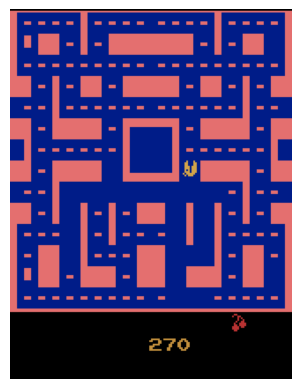

In [16]:
import gymnasium as gym
import ale_py
from matplotlib import pyplot as plt

gym.register_envs(ale_py)

env = gym.make('ALE/MsPacman-v5')
obs, info = env.reset()
for i in range(1, 2000):
    obs, reward, terminated, truncated, info = env.step(env.action_space.sample())

    if terminated:
        print(i)
        break

plt.axis('off')
plt.imshow(obs)